In [4]:
#import all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [5]:
#import the data
data = pd.read_csv("abalone.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
#check the type of data and statistics for data analysis
print(data.info())
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB
None


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [7]:
#checking for the null values
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [8]:
#checking unique values in categorical variables
data['Sex'].unique()

array(['M', 'F', 'I'], dtype=object)

Text(0.5, 1.0, 'Count of the Gender of Abalone')

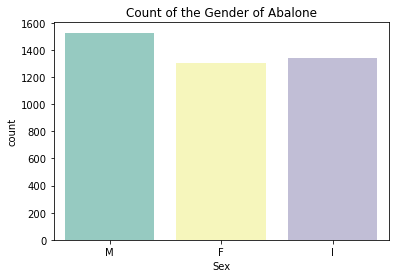

In [9]:
#plotting the count of categorical feature 
sns.countplot(data['Sex'], palette="Set3")
plt.title('Count of the Gender of Abalone')

In [10]:
#checking for the column names
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [11]:
data = pd.get_dummies(data, drop_first=True)
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


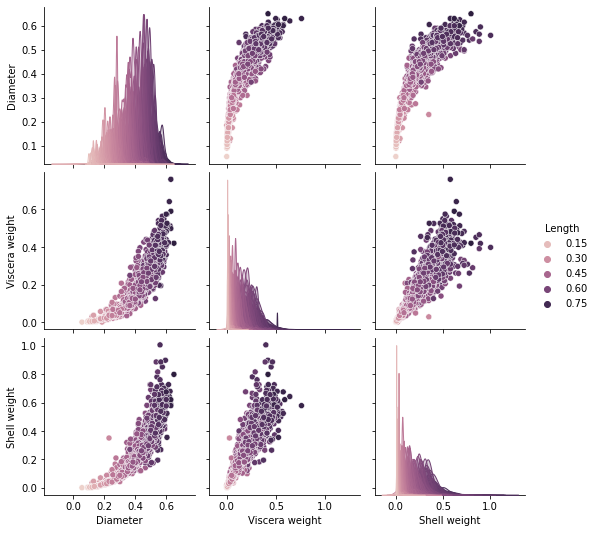

In [12]:
col = ['Diameter','Length','Viscera weight','Shell weight']
corr = data.corr() 
sns.pairplot(data[col], hue='Length')
plt.show()

In [13]:
#height has zero values, find index and remove
data[data['Height']==0]

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
1257,0.430,0.34,0.0,0.428,0.2065,0.0860,0.1150,8,1,0
3996,0.315,0.23,0.0,0.134,0.0575,0.0285,0.3505,6,1,0


In [14]:
data.drop(index=[1257,3996], inplace=True)
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090,0.320958,0.365988
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227,0.466901,0.481764
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000,0.000000,0.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000,1.000000,1.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000


In [15]:
#checking the duplicate values and droping if any
data.drop_duplicates(inplace=True)
data.shape

(4175, 10)

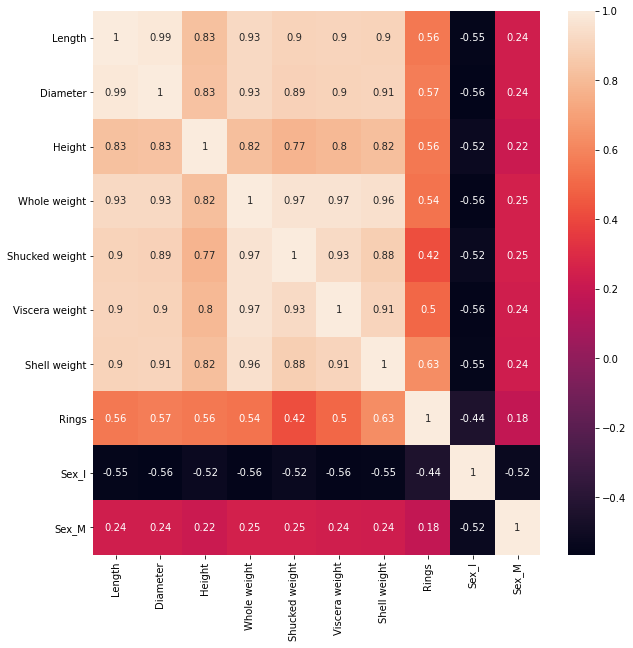

In [16]:
plt.figure(figsize=(10,10),facecolor='white')
sns.heatmap(corr, annot=True)
plt.show()

### We can see whole weight and shucked weight, viscera weight are highly correlated length, Height and diameter are highly correlated
### Removing those  columns

In [17]:
#Splitting independent and dependent variable

X=data.drop(columns=['Rings','Diameter', 'Height', 'Shucked weight'])
y=data['Rings'] 

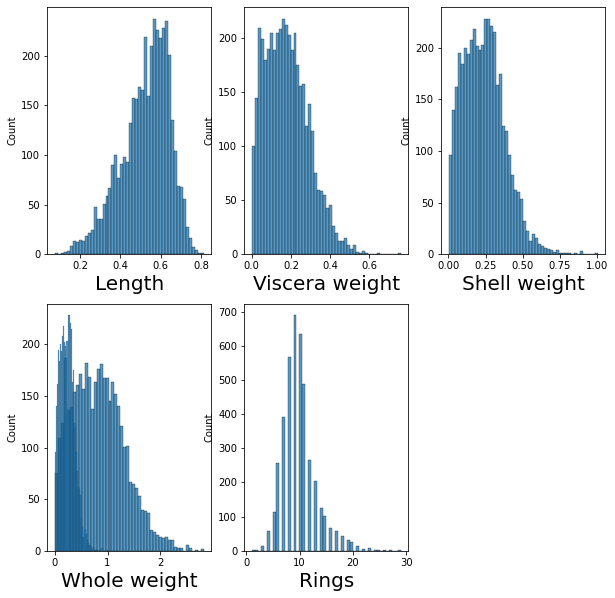

In [18]:
#visualizing the data after removal of highly correlated columns
plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(2,3,1)
sns.histplot(X['Length'],bins=50)
plt.xlabel('Length',fontsize=20)


ax = plt.subplot(2,3,2)
sns.histplot(X['Viscera weight'],bins=50)
plt.xlabel('Viscera weight',fontsize=20)
 
ax = plt.subplot(2,3,3)
sns.histplot(X['Shell weight'],bins=50)
plt.xlabel('Shell weight',fontsize=20)


ax = plt.subplot(2,3,4)
sns.histplot(X['Whole weight'],bins=50)
plt.xlabel('Whole weight',fontsize=20)

ax = plt.subplot(2,3,4)
sns.histplot(X['Shell weight'],bins=50)
plt.xlabel('Whole weight',fontsize=20)

ax = plt.subplot(2,3,5)
sns.histplot(y,bins=50)
plt.xlabel('Rings',fontsize=20)



plt.show()

In [19]:
#Handling outliers using z-score
from scipy.stats import zscore
z_score = zscore(data)
abs_z_score = np.abs(z_score)

fiter_entry = (abs_z_score<3).all(axis=1)
data = data[fiter_entry]
data.describe()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000
mean,0.520987,0.405300,0.138002,0.802805,0.349099,0.175718,0.230676,9.738763,0.328284,0.361559
std,0.115910,0.095903,0.036878,0.456192,0.206406,0.103350,0.127939,2.864691,0.469647,0.480512
min,0.165000,0.115000,0.015000,0.014500,0.005500,0.000500,0.005000,3.000000,0.000000,0.000000
25%,0.450000,0.345000,0.115000,0.438000,0.182000,0.091750,0.127750,8.000000,0.000000,0.000000
50%,0.540000,0.420000,0.140000,0.783000,0.329500,0.167000,0.225000,9.000000,0.000000,0.000000
75%,0.610000,0.480000,0.165000,1.131250,0.493500,0.246500,0.320000,11.000000,1.000000,1.000000
max,0.760000,0.605000,0.250000,2.238500,1.017000,0.492500,0.655000,19.000000,1.000000,1.000000


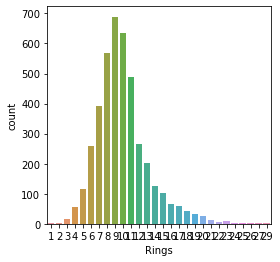

In [20]:
plt.figure(figsize=(4,4))
sns.countplot(y)
plt.show()

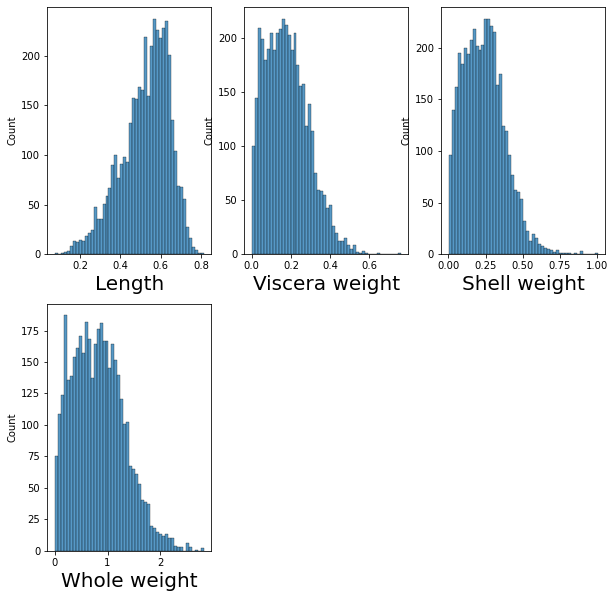

In [21]:
#visualizing the data after removal of highly correlated columns
plt.figure(figsize=(10,10),facecolor='w')
ax = plt.subplot(2,3,1)
sns.histplot(X['Length'],bins=50)
plt.xlabel('Length',fontsize=20)


ax = plt.subplot(2,3,2)
sns.histplot(X['Viscera weight'],bins=50)
plt.xlabel('Viscera weight',fontsize=20)

ax = plt.subplot(2,3,3)
sns.histplot(X['Shell weight'],bins=50)
plt.xlabel('Shell weight',fontsize=20)


ax = plt.subplot(2,3,4)
sns.histplot(X['Whole weight'],bins=50)
plt.xlabel('Whole weight',fontsize=20)

plt.show()

In [22]:
X.corrwith(y)

Length            0.556464
Whole weight      0.540151
Viscera weight    0.503562
Shell weight      0.627928
Sex_I            -0.435747
Sex_M             0.181565
dtype: float64

In [23]:
#Data standardization
#Initialize #import  >> fit >>
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X)
X_scaler

array([[-0.57527573, -0.64248543, -0.72680916, -0.63819465, -0.68750501,
         1.31618002],
       [-1.4498756 , -1.230912  , -1.20585737, -1.21292621, -0.68750501,
         1.31618002],
       [ 0.04943846, -0.31002952, -0.35725768, -0.20714599, -0.68750501,
        -0.75977449],
       ...,
       [ 0.63250504,  0.70773429,  0.97495258,  0.49690017, -0.68750501,
         1.31618002],
       [ 0.8407431 ,  0.54150633,  0.73314729,  0.41069044, -0.68750501,
        -0.75977449],
       [ 1.54875252,  2.28333056,  1.78705336,  1.84033518, -0.68750501,
         1.31618002]])

### Train Test Split

In [24]:
#creating train and test data from the existing data set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaler, y,test_size=0.25, random_state=31)

### Model Building

In [25]:
#we are using 3 models to predict the target label and select the best model based on evaluation.

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV

### Linear Regression

In [26]:
#instantiating and fitting the model
regression = LinearRegression()
regression.fit(X_train, y_train)

LinearRegression()

In [27]:
regression.score(X_train, y_train)

0.45379961082959674

In [28]:
y_pred  = regression.predict(X_test)
accuracy = r2_score(y_test, y_pred)
print("Predicted R2 score of train data:",accuracy*100)

Predicted R2 score of train data: 48.65311449463414


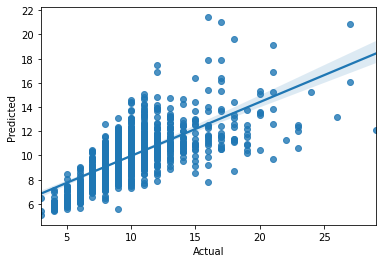

In [29]:
#Visualizing the predicted vs actual data

sns.regplot(x=y_test,y=y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")

plt.show()

In [30]:
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Mean Squared Error", mean_squared_error(y_test, y_pred))

cross_val_score(regression,X_test, y_test)

Mean Absolute Error: 1.7532190406005033
Mean Squared Error 6.186374086106754


array([0.48621663, 0.54949825, 0.58086761, 0.46579126, 0.35939786])

In [31]:
ridgeCV =RidgeCV(alphas=np.arange(0.0001,0.1,0.01), normalize=True)
ridgeCV.fit(X_train, y_train)

RidgeCV(alphas=array([0.0001, 0.0101, 0.0201, 0.0301, 0.0401, 0.0501, 0.0601, 0.0701,
       0.0801, 0.0901]),
        normalize=True)

In [32]:
ridge_reg = Ridge(alpha=ridgeCV.alpha_)
ridge_reg.fit(X_test, y_test)

Ridge(alpha=0.0001)

In [33]:
ridge_reg.score(X_test, y_test)*100

49.454759510951995

In [34]:
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error", mean_squared_error(y_test, y_pred, squared=False))

cross_val_score(regression,X_test, y_test)

Mean Absolute Error: 1.7532190406005033
Root Mean Squared Error 2.487242265262223


array([0.48621663, 0.54949825, 0.58086761, 0.46579126, 0.35939786])

### RandomForest

In [35]:
randomforest = RandomForestRegressor()
randomforest.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
#predicting the test datasets
y_pred = randomforest.predict(X_test)
accuracy = r2_score(y_test, y_pred)*100
print("The prediction of test dataset:", accuracy)

The prediction of test dataset: 48.04755217653928


In [37]:
#RandomizedSearchCV

#Hyperparameters
n_estimators=  [int(x) for x in np.linspace(start=100,stop=1200, num=12)]

#Number of features to consider at every split
max_features= ['auto','sqrt']

#max number of level trees
max_depth=[int(x) for x in np.linspace(start=5,stop=30, num = 6)]
#max depth.append(None)

#min number of samples requeired to split a node
min_samples_split= [2,5,9,14,23]

#min number of samples requeired to split a leaf node
min_samples_leaf= [1,4,9,6,13]

In [38]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features':max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 9, 14, 23], 'min_samples_leaf': [1, 4, 9, 6, 13]}


In [39]:
rf_random = RandomizedSearchCV(estimator = randomforest, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [40]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=400; total time=   0.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 9, 6, 13],
                                        'min_samples_split': [2, 5, 9, 14, 23],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [41]:
rf_random.best_estimator_
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.8s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.9s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   3.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=9, min_samples_split=23, n_estimators=700; total time=   2.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimators=400; total time=   0.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=6, min_samples_split=9, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 4, 9, 6, 13],
                                        'min_samples_split': [2, 5, 9, 14, 23],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [42]:
predictions=rf_random.predict(X_test)
print(len(predictions))
print(len(y_test))

1044
1044


In [43]:
score = r2_score(y_test, predictions)
score

0.5103266590564395

In [57]:
print("Mean Absolute Error:",mean_absolute_error(y_test, y_pred))
print("Root Mean Squared Error", mean_squared_error(y_test, y_pred, squared=False))

cross_val_score(regression,X_test, y_test)

Mean Absolute Error: 1.721044061302682
Root Mean Squared Error 2.5018659894404363


array([0.48621663, 0.54949825, 0.58086761, 0.46579126, 0.35939786])

### XGBoost

In [45]:
#instantiation >> fit
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [48]:
xgb_preds = xgb.predict(X_test)

In [51]:
print("MAE: " + str(mean_absolute_error(xgb_preds,y_test)))
print("Accuracy:",xgb.score(X_test,y_test))

MAE: 1.7659564696509262
Accuracy: 0.43498429636279223


### Let us hyperparameter tuning for the model to check if we can increase the accuracy

In [55]:
xgb_model_II = XGBRegressor(n_estimators=1000,learning_rat=0.05)
xgb_model_II.fit(X_train,y_train,early_stopping_rounds=5,
             eval_set=[(X_test,y_test)],verbose=False)
xgb_preds = xgb_model_II.predict(X_test)
print("MAE: " + str(mean_absolute_error(xgb_preds,y_test)))
print("Accuracy:",xgb_model_II.score(X_test,y_test))

[21:53:24] WARNING: ..\src\learner.cc:576: 
Parameters: { "learning_rat" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


MAE: 1.656123269791804
Accuracy: 0.49791793058592637


### We can see only improvement is slightly marginal. The difference between the XGBoost and Forests is also slightly marginal.

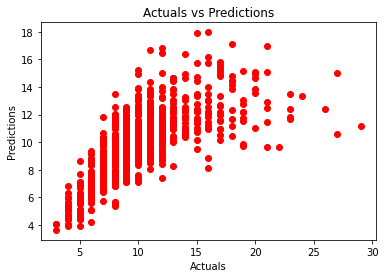

In [56]:
plt.scatter(y_test,xgb_preds,color='r')
plt.xlabel('Actuals')
plt.ylabel('Predictions')
plt.title('Actuals vs Predictions')
plt.show()

### Evaluation of Models			
Models	 	
			
Linear Regression	
MAE: Cross-val	1.72	
Accuracy        49.454	
Rank            3rd    
			
Random Forests	
MAE: Cross-val	1.721	
Accuracy        51.03	    
Rank            1st
			
XGBoost	
MAE: Cross-val	1.656123	
Accuracy        49.79	    
Rank            2nd 

## Saving the best model:
    

In [58]:
#save the model
import pickle

#open a file where you want to store the dat
file = open('Abalone_random_forest.pkl','wb')

In [59]:
#dump the information to the file
pickle.dump(rf_random,file)